In [6]:
import pandas as pd
import numpy as np
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

data = pd.read_csv("Walmart_sales.csv") 
df = pd.DataFrame(data)

print(df.head())


   Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0      1  05-02-2010    1643690.90             0        42.31       2.572   
1      1  12-02-2010    1641957.44             1        38.51       2.548   
2      1  19-02-2010    1611968.17             0        39.93       2.514   
3      1  26-02-2010    1409727.59             0        46.63       2.561   
4      1  05-03-2010    1554806.68             0        46.50       2.625   

          CPI  Unemployment  
0  211.096358         8.106  
1  211.242170         8.106  
2  211.289143         8.106  
3  211.319643         8.106  
4  211.350143         8.106  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB
None


In [8]:
print(df.isnull().sum())
#THERE IS NO NULL VALUE 

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64


In [9]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


# Extract numeric features
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Week'] = df['Date'].dt.isocalendar().week

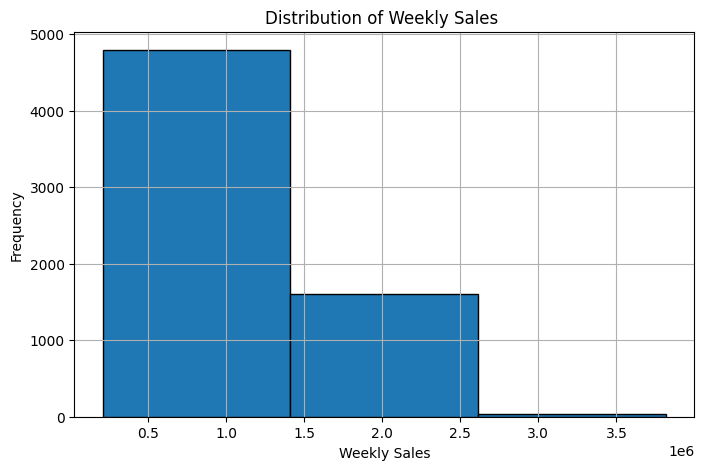

In [10]:
# CHECKING DISTRIBUTION AND PLOTTING SALES TREND 
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 5))
plt.hist(df['Weekly_Sales'], bins=3, edgecolor='k')
plt.title('Distribution of Weekly Sales ')
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

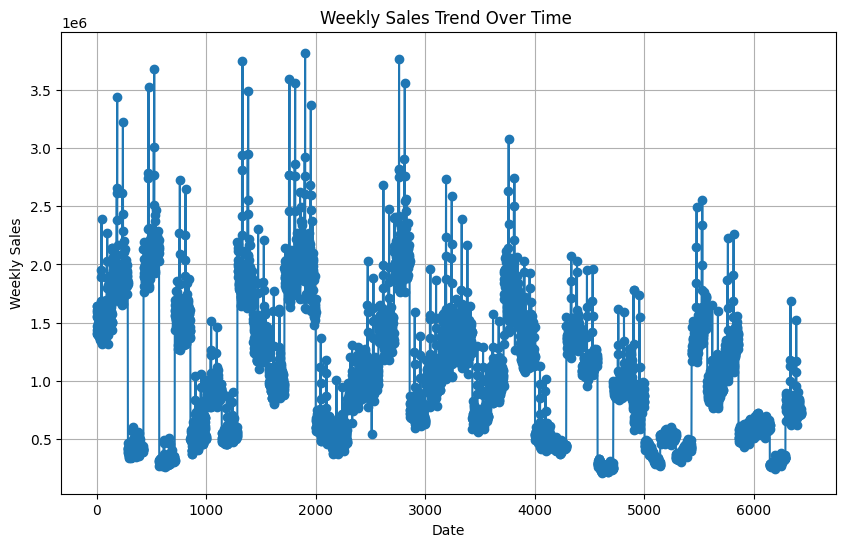

In [11]:
#PLOTTING SALES TREND
plt.figure(figsize=(10, 6))
df['Weekly_Sales'].plot(marker='o')
plt.title('Weekly Sales Trend Over Time ')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.grid(True)
plt.show()

In [12]:
from sklearn.preprocessing import MinMaxScaler
features_to_scale= ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

scaler=MinMaxScaler()
df[features_to_scale]=scaler.fit_transform(df[features_to_scale])

print(df)

      Store       Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0       0.0 2010-02-05    1643690.90           0.0     0.434149    0.050100   
1       0.0 2010-02-12    1641957.44           1.0     0.396967    0.038076   
2       0.0 2010-02-19    1611968.17           0.0     0.410861    0.021042   
3       0.0 2010-02-26    1409727.59           0.0     0.476419    0.044589   
4       0.0 2010-03-05    1554806.68           0.0     0.475147    0.076653   
...     ...        ...           ...           ...          ...         ...   
6430    1.0 2012-09-28     713173.95           0.0     0.654990    0.764028   
6431    1.0 2012-10-05     733455.07           0.0     0.655088    0.758016   
6432    1.0 2012-10-12     734464.36           0.0     0.553131    0.765531   
6433    1.0 2012-10-19     718125.53           0.0     0.572701    0.750000   
6434    1.0 2012-10-26     760281.43           0.0     0.595988    0.706413   

           CPI  Unemployment  Year  Month  Day  Wee

In [13]:
# Features (X) and Target (y)
x = df['Store'].values
y = df['Weekly_Sales'].values



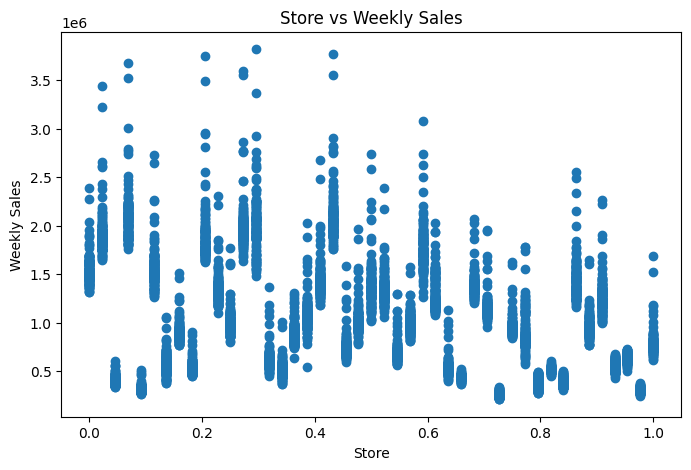

In [14]:
plt.figure(figsize=(8,5))
plt.scatter(x,y)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title("Store vs Weekly Sales")
plt.show()

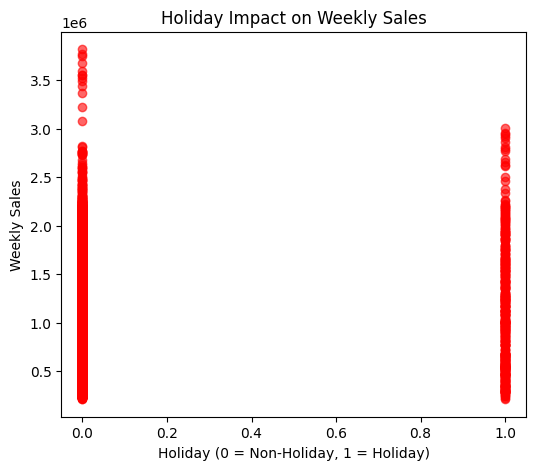

In [15]:
plt.figure(figsize=(6,5))
plt.scatter(df["Holiday_Flag"], df["Weekly_Sales"], alpha=0.6, color="red")
plt.xlabel("Holiday (0 = Non-Holiday, 1 = Holiday)")
plt.ylabel("Weekly Sales")
plt.title("Holiday Impact on Weekly Sales")
plt.show()

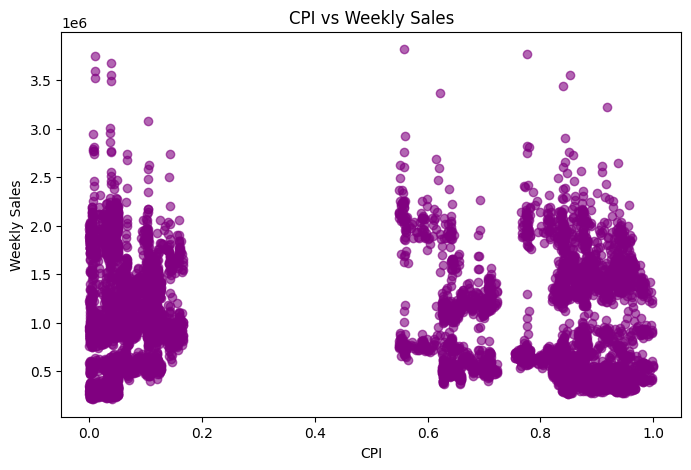

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(df["CPI"], df["Weekly_Sales"], alpha=0.6, color="purple")
plt.xlabel("CPI")
plt.ylabel("Weekly Sales")
plt.title("CPI vs Weekly Sales")
plt.show()

In [17]:
#CREATING COST FUNCTION 

def cost_function(x,y,w,b):
    m=len(x)
    cost_sum=0

    for i in range(m):
        f=w*x[i]+b
        cost=(f-y[i])**2
        cost_sum+=cost
    total_cost=(1/2*m)*cost_sum
    return total_cost 

In [18]:
#IMPLEMENTING GRADIEND DESCENT FUNCTION 

def gradient_function(x,y,w,b):
    m=len(x)
    dc_dw=0
    dc_db=0

    for i in range(m):
        f=w*x[i]+b

        dc_dw+=(f-y[i])*x[i]
        dc_db+=(f-y[i])
    dc_dw=(1/m)*dc_dw
    dc_db=(1/m)*dc_db

    return dc_dw,dc_db

In [19]:
def gradient_descent(x,y,alpha,iterations):
    w=0
    b=0

    for i in range(iterations):
        dc_dw,dc_db=gradient_function(x,y,w,b)

        w=w-alpha*dc_dw
        b=b-alpha*dc_db

        print(f"Iteraion {i} , Cost {cost_function(x,y,w,b)}")

    return w,b

In [20]:
learning_rate=0.01
iterations=10000

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)


final_w,final_b=gradient_descent(x_train,y_train,learning_rate,iterations)
print(f"w:{final_w:.4f} , b:{final_b:.4f}")

Iteraion 0 , Cost 1.833190996385912e+19
Iteraion 1 , Cost 1.799483656342449e+19
Iteraion 2 , Cost 1.7666237166275213e+19
Iteraion 3 , Cost 1.7345897705895494e+19
Iteraion 4 , Cost 1.7033609524842303e+19
Iteraion 5 , Cost 1.6729169238066209e+19
Iteraion 6 , Cost 1.6432378599685134e+19
Iteraion 7 , Cost 1.6143044373125777e+19
Iteraion 8 , Cost 1.5860978204545085e+19
Iteraion 9 , Cost 1.558599649945116e+19
Iteraion 10 , Cost 1.5317920302441153e+19
Iteraion 11 , Cost 1.5056575179978211e+19
Iteraion 12 , Cost 1.480179110613088e+19
Iteraion 13 , Cost 1.4553402351198718e+19
Iteraion 14 , Cost 1.4311247373153386e+19
Iteraion 15 , Cost 1.4075168711821857e+19
Iteraion 16 , Cost 1.3845012885744325e+19
Iteraion 17 , Cost 1.3620630291637496e+19
Iteraion 18 , Cost 1.3401875106398935e+19
Iteraion 19 , Cost 1.3188605191587447e+19
Iteraion 20 , Cost 1.2980682000316955e+19
Iteraion 21 , Cost 1.277797048650331e+19
Iteraion 22 , Cost 1.2580339016404064e+19
Iteraion 23 , Cost 1.2387659282393481e+19
Iteraio

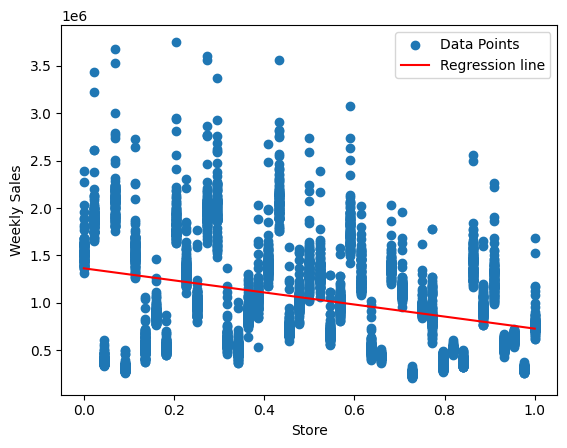

In [21]:
plt.scatter(x_train,y_train,label="Data Points")
x_vals=np.linspace(min(x_train),max(x_train),100)
y_vals=final_w*x_vals+final_b
plt.plot(x_vals,y_vals,color='red',label="Regression line")
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

In [ ]:
#WE WILL EXTRACT NUMERIC FEATURES AS YEAR,MONTH,DAY,WEEK FROM THE DATE FOR USING IT IN RANDOM FOREST MODEL 

features = ['Store', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day', 'Week']
X = df[features].values 
y = df['Weekly_Sales'].values


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(
    n_estimators=100,   # number of trees
    random_state=42,
    n_jobs=-1           # use all CPU cores
)

# Train model
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

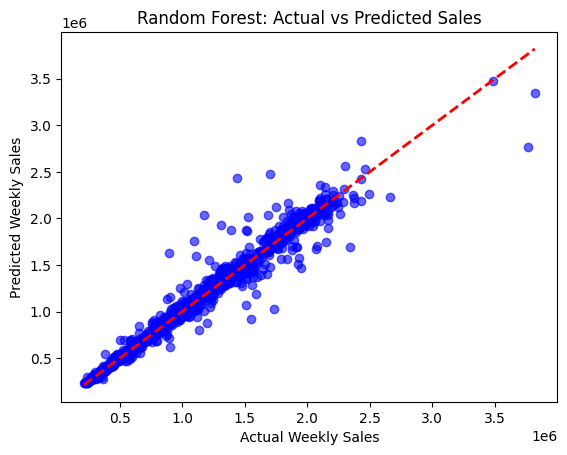

In [23]:
plt.scatter(y_test,y_pred_rf,alpha=0.6,color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.title("Random Forest: Actual vs Predicted Sales")
plt.show()

In [29]:
#EVALUATING THE MODEL

try:
    #LINEAR REGRESSION
    if 'final_w' in globals() and 'final_b' in globals():
        y_pred = final_w * x_train + final_b  #PREDICTIONS FOR TRAINING SET
        y_pred_test = final_w * x_test + final_b  #PREDICTIONS FOR TEST SET

        RMSE = np.sqrt(mean_squared_error(y_test, y_pred_test))
        MAE = mean_absolute_error(y_test, y_pred_test)
        R2 = r2_score(y_test, y_pred_test)

        print("Linear Regression Performance:")
        print(f"RMSE: {RMSE:.2f}")
        print(f"MAE: {MAE:.2f}")
        print(f"R²: {R2:.4f}")
    else:
        print("Error: Linear Regression model not trained. Skipping evaluation.")

    print()

    #RANDOM FOREST 
    if 'y_pred_rf' in globals():
        RMSE = np.sqrt(mean_squared_error(y_test, y_pred_rf))
        MAE = mean_absolute_error(y_test, y_pred_rf)
        R2 = r2_score(y_test, y_pred_rf)

        print("Random Forest Performance:")
        print(f"RMSE: {RMSE:.2f}")
        print(f"MAE: {MAE:.2f}")
        print(f"R²: {R2:.4f}")
    else:
        print("Error: Random Forest model not trained. Skipping evaluation.")

except Exception as e:
    print("Evaluation failed due to error:", str(e))


Linear Regression Performance:
RMSE: 533199.35
MAE: 440893.64
R²: 0.1175

Random Forest Performance:
RMSE: 106771.64
MAE: 54029.61
R²: 0.9646
